In [1]:
import numpy as np
import torch
import pandas as pd
#from models.BivariateHMM import BivariateHMM
from models.CopulaHMM import CopulaHMM
from utils.Plots import plotEPS_with_states,plotEPS_distribution

In [2]:
DATA_DIR="data/"
MAX_HIDDEN_STATES=5
MIN_HIDDEN_STATES=2

In [3]:
data = pd.read_csv(f"{DATA_DIR}hulls_df_matchday2_reduced.csv")
data = data.dropna()

events=pd.read_csv(f"{DATA_DIR}matchday2_events.csv")
goals_info=events[events["Subtype"].isin(["ON TARGET-GOAL","HEAD-ON TARGET-GOAL","WOODWORK-GOAL"])]
home_goals=goals_info[goals_info["Team"]=="Home"]
away_goals=goals_info[goals_info["Team"]=="Away"]
shots_info=events[events["Type"]=="SHOT"]
home_shot=shots_info[shots_info["Team"]=="Home"]
away_shot=shots_info[shots_info["Team"]=="Away"]


sequence_XY = torch.tensor(data[["HomeHull","AwayHull"]].values/100)

## Quantitative comparison

In [ ]:
AIC_list=[]
for state in range(2,MAX_HIDDEN_STATES+1):
    posterior = torch.load(f"parameters/CopulaHMM_matchday2_{state}states.pt")
    model=CopulaHMM.from_posterior(posterior)
    AIC_list.append(model.AIC(sequence_XY).item())

In [ ]:
for state,aic in enumerate(AIC_list):
    print(f"AIC of the model with {state+MIN_HIDDEN_STATES} hidden states-> {aic}")

## Qualitative comparison

In [17]:
HIDDEN_STATES=2

In [18]:
posterior=torch.load(f"parameters/CopulaHMM_matchday2_{HIDDEN_STATES}states.pt")

In [19]:
model=CopulaHMM.from_posterior(posterior)

In [20]:
MLS=model.viterbi(sequence_XY)

In [21]:
data["State"]=MLS.numpy()

In [25]:
class_colors = {
    0: 'green',
    1: 'orange',
    # 2: 'red',
    # 3: 'blue',
    #4: 'purple'
}

In [26]:
p1=plotEPS_with_states(data,home_goals,away_goals,home_shot,away_shot,class_colors)
p2=plotEPS_distribution(data,class_colors)

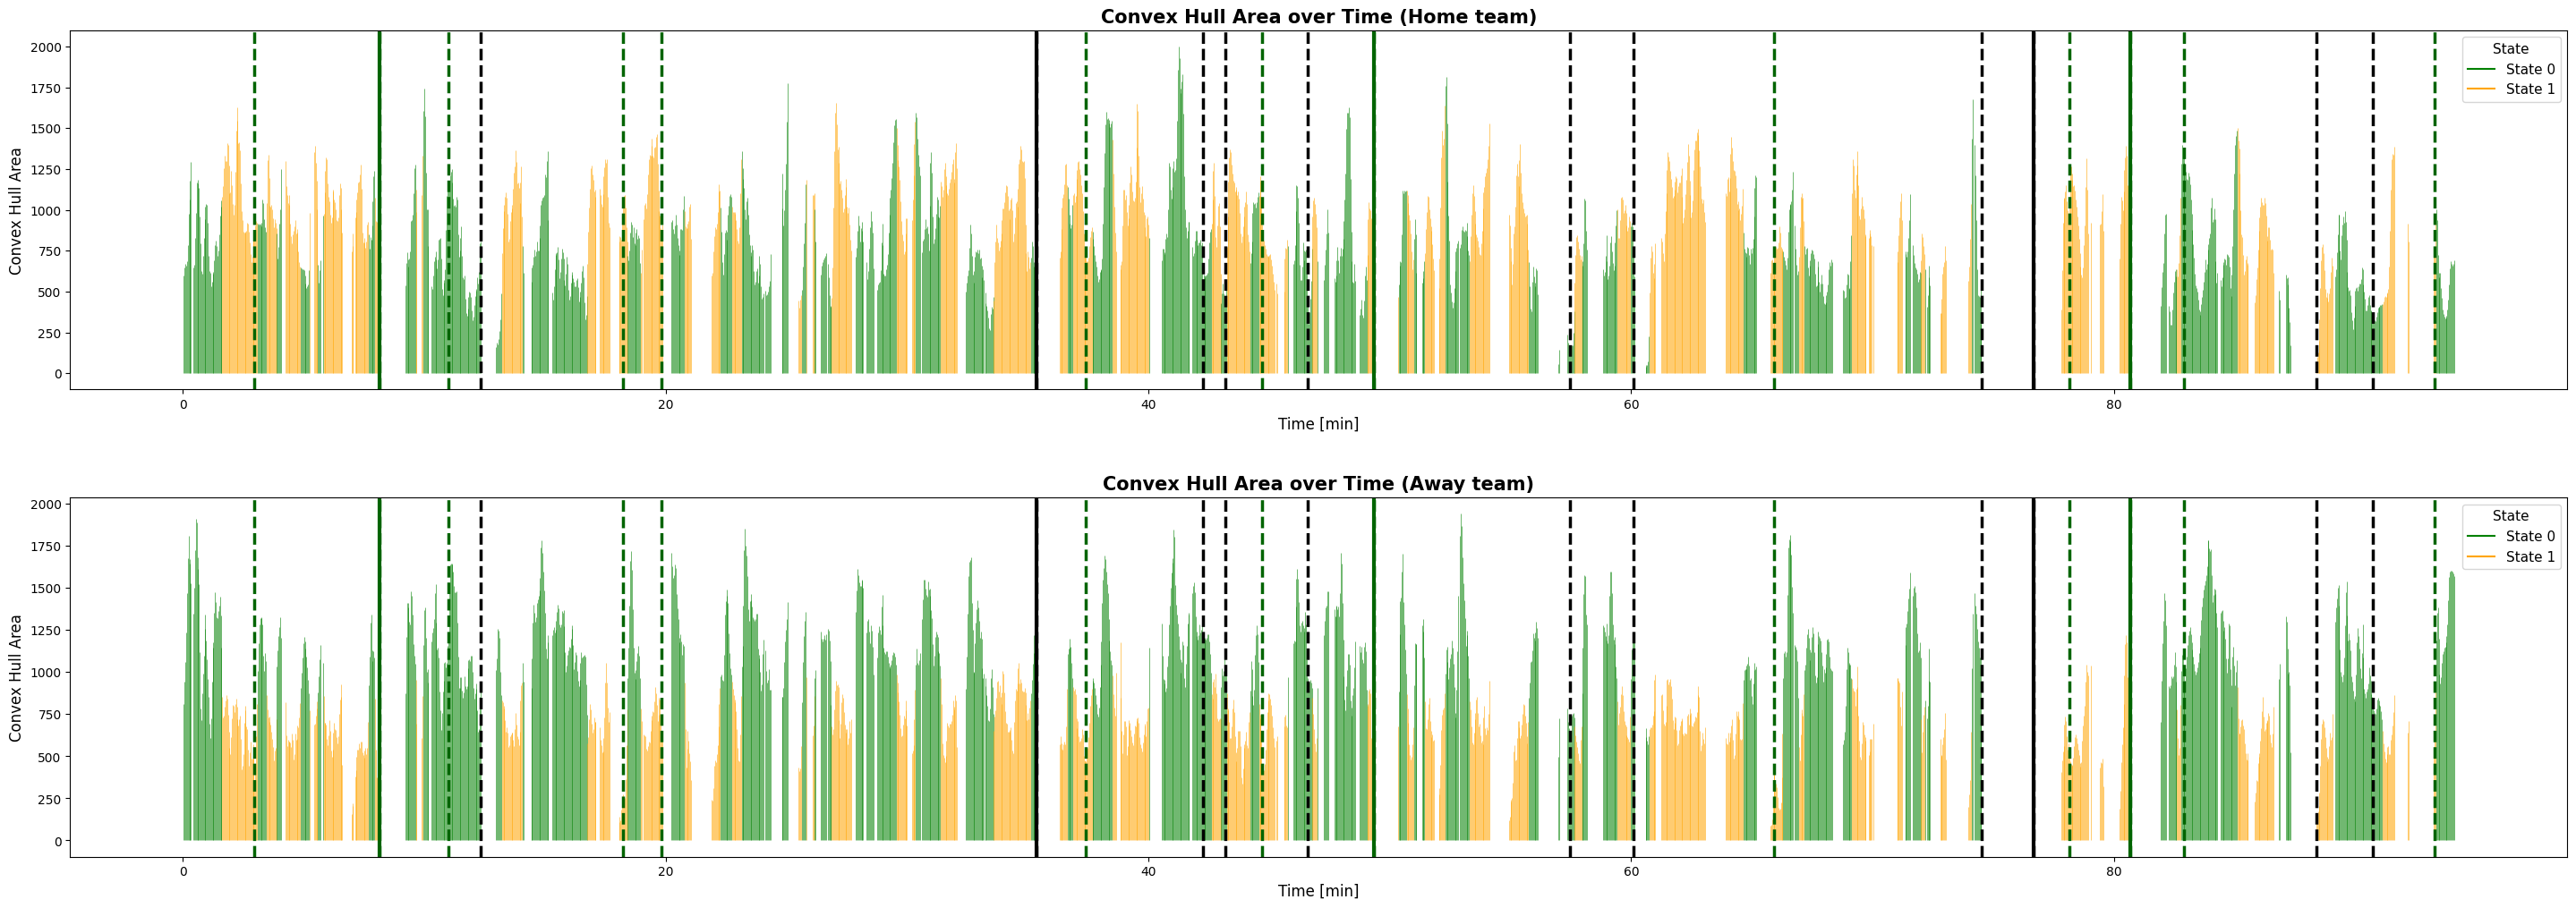

In [27]:
p1

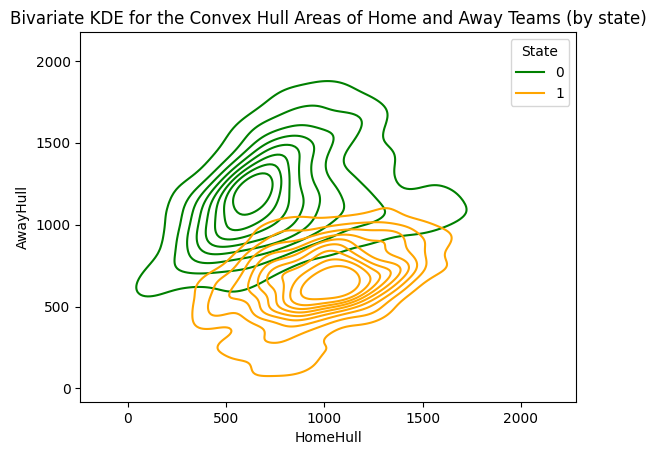

In [28]:
p2